In [1]:
#Importing Libraries we will need
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
#defining number of data points
NUM_SAMPLES = 200

#Simulating data. x1 is random from 0 to 1
x1 = np.random.rand(NUM_SAMPLES)
#x2 is very correlated to x1, with small random fluctuations
x2 = x1 + np.random.rand(NUM_SAMPLES)/10

#x3-5 are random
x3 = np.random.rand(NUM_SAMPLES)
x4 = np.random.rand(NUM_SAMPLES)
x5 = np.random.rand(NUM_SAMPLES)

#y is generated by x1 - x2/2 + noise
y = x1 - x2/2 + np.random.rand(NUM_SAMPLES)/10

#Lets pack it all into a data frame. A data frame is similar to a SQL table, displayed below
df = pd.DataFrame({'x1':x1, 'x2':x2,'x3':x3,'x4':x4,'x5':x5, 'y':y})

df.head()

,x1,x2,x3,x4,x5,y
0,0.585339,0.623309,0.484496,0.820955,0.183895,0.321554
1,0.774399,0.842646,0.097165,0.931907,0.346819,0.356083
2,0.283439,0.310713,0.896584,0.310940,0.397825,0.183047
3,0.598820,0.631226,0.195086,0.407565,0.552981,0.355025
4,0.381349,0.412022,0.497262,0.521527,0.336009,0.185744


In [3]:
#X is the input features. Think of these like marketing spend by day
X = df[['x1', 'x2', 'x3', 'x4', 'x5']]
#Y is the target variable. Think of this like the sales by day, as a function of marketing spend
Y = df['y']

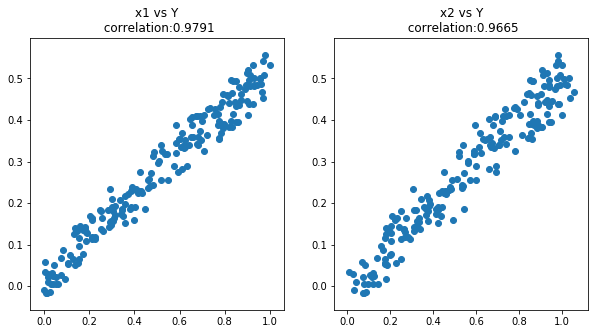

In [4]:
#Lets visualize the correlations between x1 vs Y and x2 vs Y
plt.figure(figsize=(10,5))
plt.subplot(1,2,1).scatter(x1,Y)
plt.title('x1 vs Y\n correlation:' + str(np.corrcoef(x1, Y)[0,1].round(4)))
plt.subplot(1,2,2).scatter(x2,Y)
plt.title('x2 vs Y\n correlation:' + str(np.corrcoef(x2, Y)[0,1].round(4)))
plt.show()
plt.show()


In [5]:
#Here we build a regression model using sklearn Ridge and fit it to our dataset
RegressionModel = Ridge(1e-3).fit(X,Y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)

In [6]:

print('Regression coefficients from Sklearn')
print(list(zip(['x1', 'x2', 'x3', 'x4', 'x5'], coefs)))

Regression coefficients from Sklearn
[('x1', 1.0), ('x2', -0.49), ('x3', 0.0), ('x4', -0.01), ('x5', 0.01)]


In [7]:
# Below we solve the same problem using tensorflow. Note the significant added complexity to perform the same task
# The reason for using tensorflow as opposed to sklearn will come up later, in that it gives us added control
import tensorflow as tf
tf.reset_default_graph()

# We define our inputs
x_ph = tf.placeholder(tf.float32, (None, 5))
y_ph = tf.placeholder(tf.float32, (None))

#We define a linear regression layer
yhat = tf.layers.dense(x_ph, 1, name='regression_coefficients')

#we calculate our loss
loss = tf.reduce_mean(tf.square(yhat[:,0] - y_ph))

#We minimize the loss
optimizer = tf.train.GradientDescentOptimizer(.1).minimize(loss)

#Tensorflow necessary initialization of our model.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#We take optimization steps training the model to fit X, Y
for i in range(40000):
    sess.run(optimizer, {x_ph:X, y_ph:Y})
    
#We analyze the regression coefficients (ROI) the model learned
with tf.variable_scope("regression_coefficients", reuse=True):
    weights = tf.get_variable("kernel")
print('Regression coefficients From Tensorflow:')

coefs = sess.run(weights[:,0]).round(2)
print(list(zip(['x1', 'x2', 'x3', 'x4', 'x5'], coefs)))

Regression coefficients From Tensorflow:
[('x1', 0.97), ('x2', -0.46), ('x3', 0.0), ('x4', -0.01), ('x5', 0.01)]
